In [1]:
import h5py
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


# Load dataset from HDF5 file
with h5py.File('data.hdf5', 'r') as f:
    X_trainval = np.array(f['trainval/images_log'])
    y_trainval = np.array(f['trainval/pv_log'])
    X_test = np.array(f['test/images_log'])
    y_test = np.array(f['test/pv_log'])


# Flatten 3D arrays to 2D arrays for training and testing
X_trainval_flat = X_trainval.reshape(X_trainval.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print("XTrain shape: ",X_trainval_flat.shape)
print("YTrain shape: ",y_trainval.shape)
print("XTest shape: ",X_test.shape)
print("XTest shape: ",y_test.shape)

XTrain shape:  (16435, 12288)
YTrain shape:  (16435,)
XTest shape:  (5877, 64, 64, 3)
XTest shape:  (5877,)


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualise(y_pred,y_test):

    f = plt.figure()
    f.set_figheight(5)
    f.set_figwidth(18)

    # Line plot
    plt.plot(y_test, label='True Values')
    plt.plot(y_pred, label='Predictions')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Line Plot')
    plt.show()

    # Distribution plot
    sns.distplot(y_test, hist=False, label='True Values')
    sns.distplot(y_pred, hist=False, label='Predictions')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title("Distribution Plot")
    plt.legend()
    plt.show()


    # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # # Distribution plot
    # sns.distplot(y_test, hist=False, label='True Values',ax=ax1)
    # sns.distplot(y_pred, hist=False, label='Predictions',ax=ax1)
    # ax1.set_xlabel('Value')
    # ax1.set_ylabel('Density')
    # ax1.set_title("Distribution Plot")
    # ax1.legend()
    # # plt.show()


    # # Distribution plot
    # sns.histplot(y_test,kde=True,label="True Values",ax=ax2)
    # sns.histplot(y_pred,kde=True,label="Predicted Values",ax=ax2)
    # ax2.set_xlabel("Value")
    # ax2.set_ylabel("Density")
    # ax2.set_title("Distribution Plot")
    # ax2.legend()

    # plt.subplots_adjust(wspace=0.4)
    # plt.show()



    # Box plot
    data = [y_test, y_pred]
    labels = ['True Values', 'Predictions']
    plt.boxplot(data, labels=labels)
    plt.ylabel('Value')
    plt.title("Box Plot")
    plt.show()

In [4]:
def performance_metrics(y_pred,y_test):
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    return [rmse,mae,r2]

# Random Forest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=42)
RFR.fit(X_trainval_flat,y_trainval)

RandomForestRegressor(random_state=42)

Root Mean squared error for Random Forest Regressor: 2.1188084201463977
Mean Absolute error for Random Forest Regressor: 1.2776705821827696
R2 value for Random Forest Regressor: 0.9140541304974433


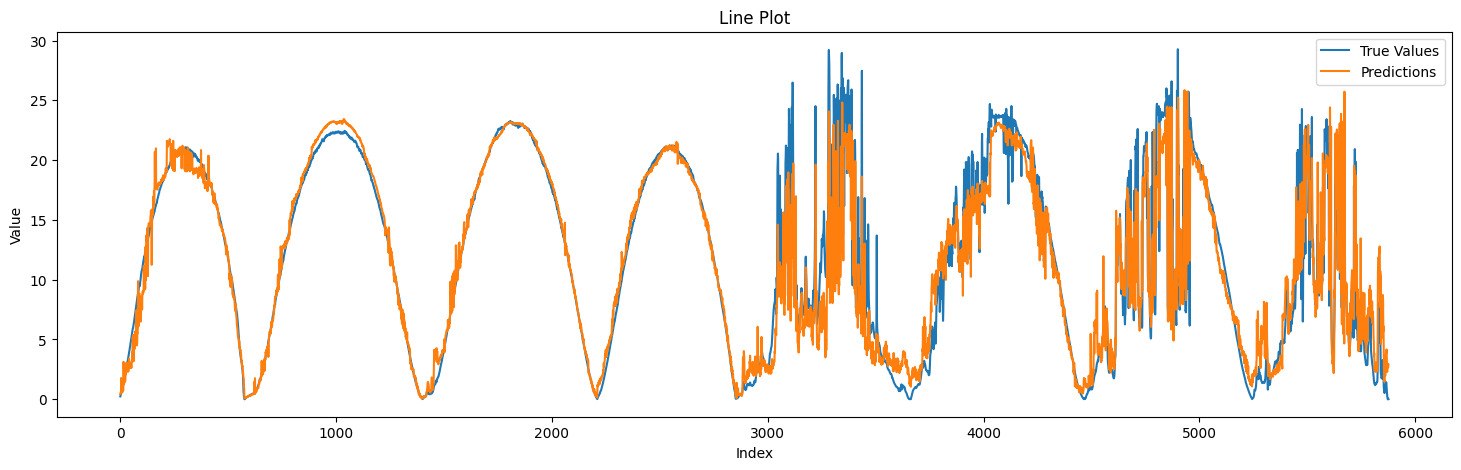

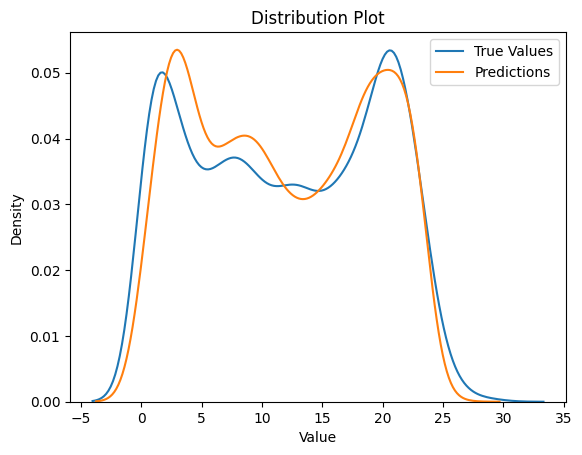

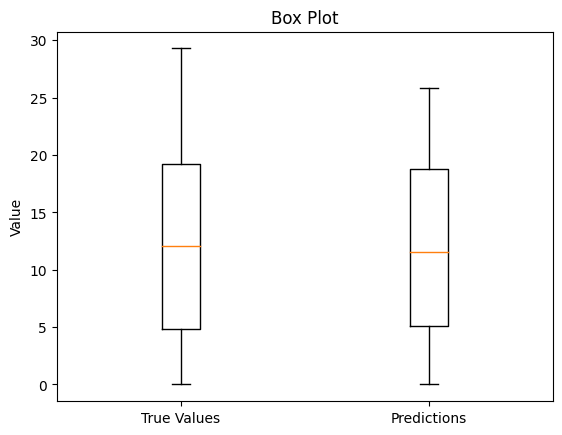

In [6]:
#  Predict PV values for test data
RFR_y_pred = RFR.predict(X_test_flat)

[RFR_rmse,RFR_mae,RFR_r2] = performance_metrics(y_test,RFR_y_pred)

# Evaluate model accuracy on test data
print('Root Mean squared error for Random Forest Regressor:', RFR_rmse)
print('Mean Absolute error for Random Forest Regressor:', RFR_mae)
print('R2 value for Random Forest Regressor:', RFR_r2)


visualise(RFR_y_pred,y_test)

# Gradient Boosting Regressor

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_trainval_flat,y_trainval)

GradientBoostingRegressor(random_state=0)

Root Mean squared error for Gradient Boosting Regressor: 2.2679817083152893
Mean Absolute error for Gradient Boosting Regressor: 1.4500079121919462
R2 value for Gradient Boosting Regressor: 0.903271345752912


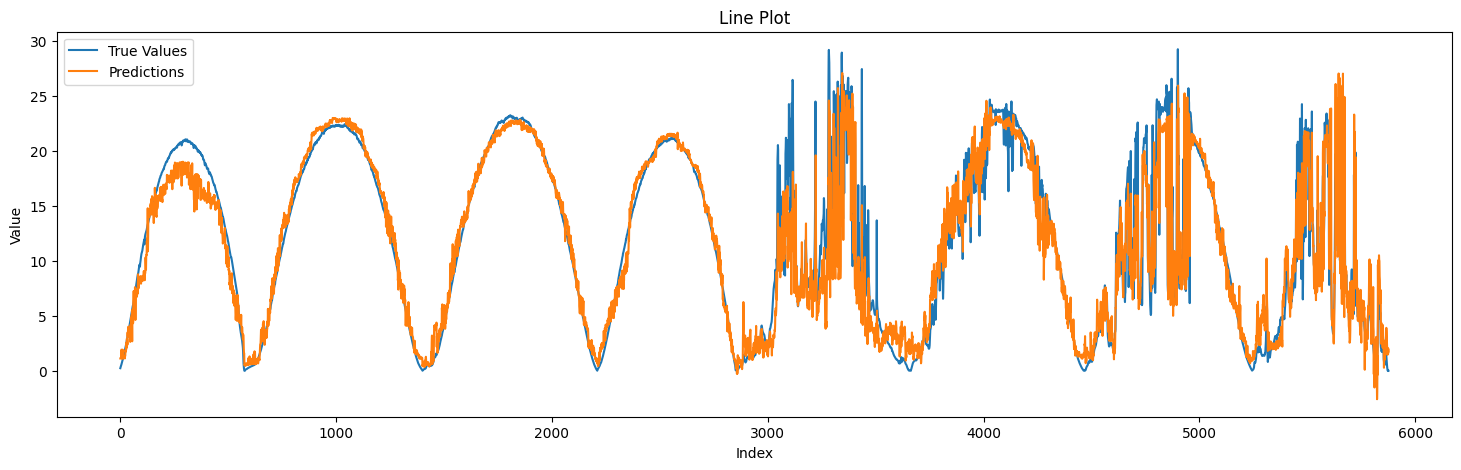

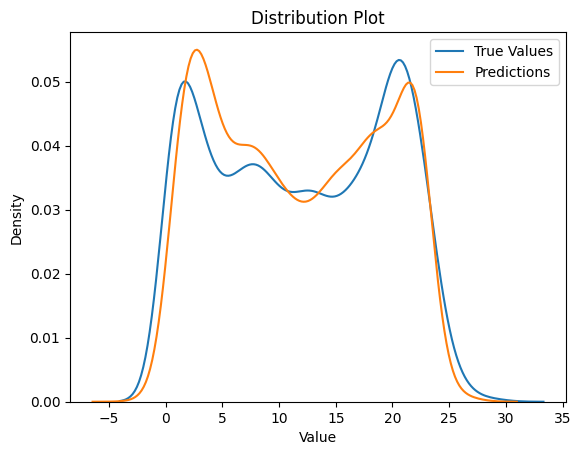

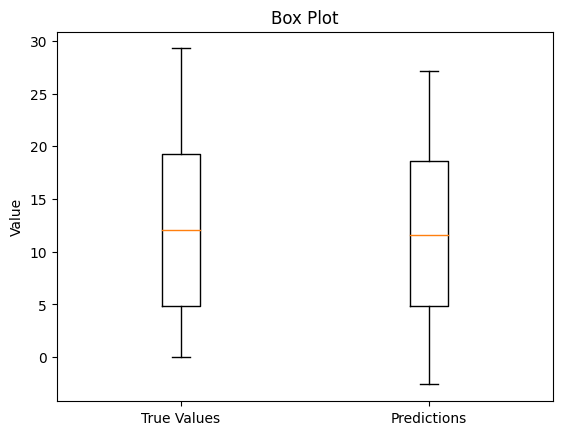

In [8]:
#  Predict PV values for test data
GBR_y_pred = GBR.predict(X_test_flat)

[GBR_rmse,GBR_mae,GBR_r2] = performance_metrics(y_test,GBR_y_pred)

# Evaluate model accuracy on test data
print('Root Mean squared error for Gradient Boosting Regressor:', GBR_rmse)
print('Mean Absolute error for Gradient Boosting Regressor:', GBR_mae)
print('R2 value for Gradient Boosting Regressor:', GBR_r2)


visualise(GBR_y_pred,y_test)

# Multi-Layer Perceptron 

In [23]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
MLP.fit(X_trainval_flat, y_trainval)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

Root Mean squared error for Multi-Layer Perceptron:  4.918495827260957
Mean Absolute error for Multi-Layer Perceptron:  4.074866992076688
R2 value for Multi-Layer Perceptron:  0.6075575141763632


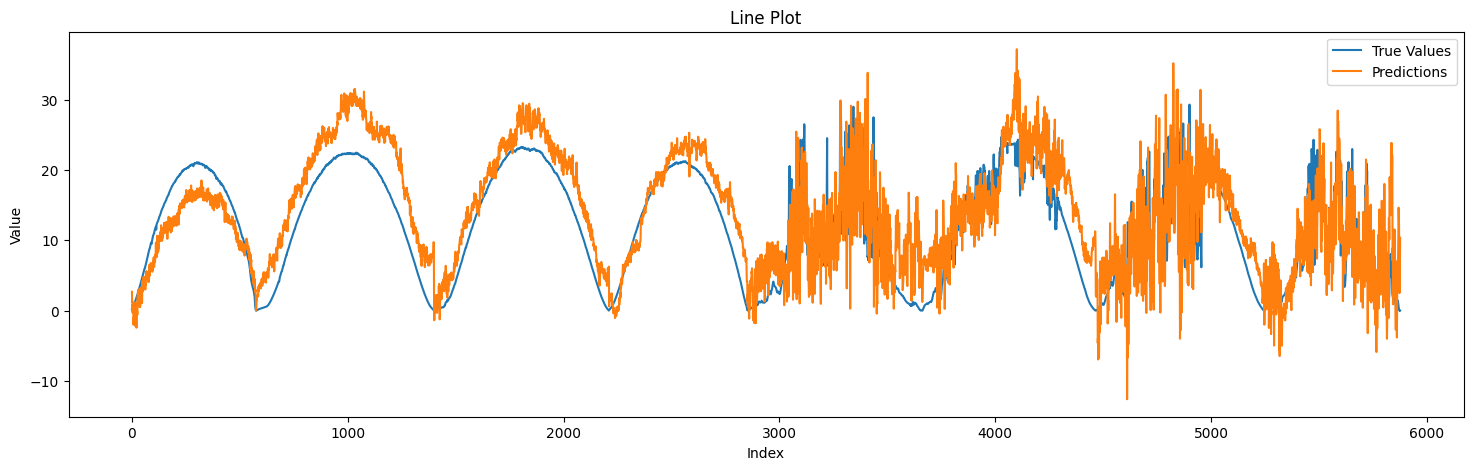

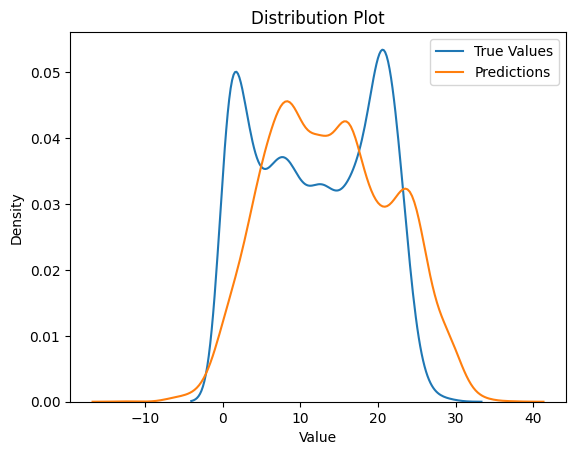

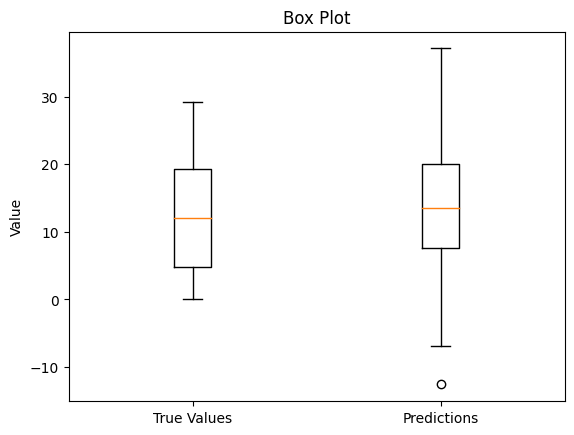

In [24]:
#  Predict PV values for test data
MLP_y_pred = MLP.predict(X_test_flat)


[MLP_rmse,MLP_mae,MLP_r2] = performance_metrics(y_test,MLP_y_pred)

# Evaluate model accuracy on test data
print('Root Mean squared error for Multi-Layer Perceptron: ', MLP_rmse)
print('Mean Absolute error for Multi-Layer Perceptron: ', MLP_mae)
print('R2 value for Multi-Layer Perceptron: ', MLP_r2)


visualise(MLP_y_pred,y_test)

# Convolutional Neural Networks (CNN)

In [11]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Define the model architecture
CNN_model = Sequential()
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_trainval.shape[1:]))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(1, activation=None))

# Compile the model
CNN_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
CNN_model.fit(X_trainval, y_trainval, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# CNN_model.summary()

Epoch 1/100
514/514 [==============================] - 63s 121ms/step - loss: 21.0688 - mse: 21.0688 - val_loss: 6.4825 - val_mse: 6.4825
Epoch 2/100
514/514 [==============================] - 62s 121ms/step - loss: 2.9122 - mse: 2.9122 - val_loss: 4.9093 - val_mse: 4.9093
Epoch 3/100
514/514 [==============================] - 62s 121ms/step - loss: 2.2294 - mse: 2.2294 - val_loss: 4.6353 - val_mse: 4.6353
Epoch 4/100
514/514 [==============================] - 62s 121ms/step - loss: 1.9517 - mse: 1.9517 - val_loss: 4.8943 - val_mse: 4.8943
Epoch 5/100
514/514 [==============================] - 62s 121ms/step - loss: 1.7276 - mse: 1.7276 - val_loss: 4.6598 - val_mse: 4.6598
Epoch 6/100
514/514 [==============================] - 62s 121ms/step - loss: 1.6615 - mse: 1.6615 - val_loss: 4.8032 - val_mse: 4.8032
Epoch 7/100
514/514 [==============================] - 62s 121ms/step - loss: 1.5569 - mse: 1.5569 - val_loss: 4.3357 - val_mse: 4.3357
Epoch 8/100
514/514 [=========================

184/184 [==============================] - 4s 21ms/step
Root Mean squared error for Convolutional Neural Networks:  2.365164664763399
Mean Absolute error for Convolutional Neural Networks:  1.462374527113088
R2 value for Convolutional Neural Networks:  0.8999006176035375


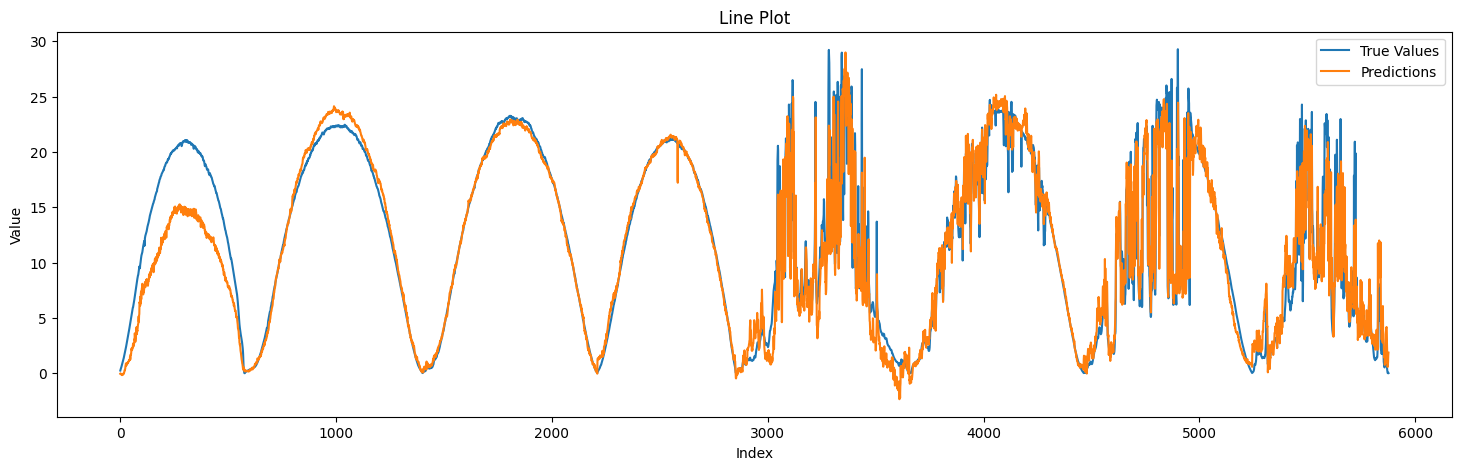

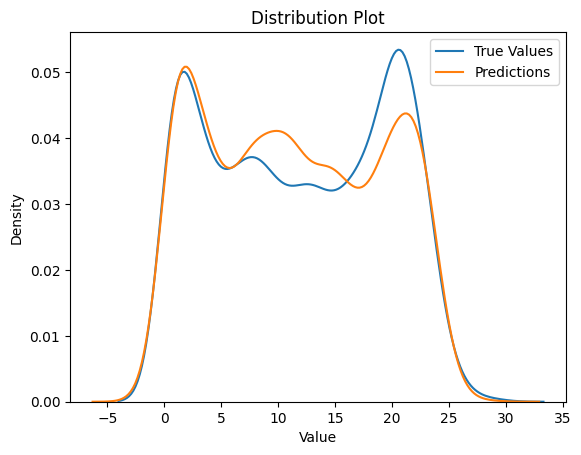

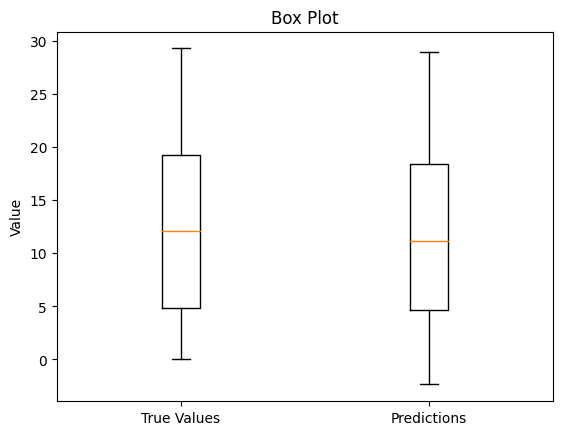

In [12]:
CNN_y_pred = CNN_model.predict(X_test)

CNN_y_pred = np.squeeze(CNN_y_pred)

[CNN_rmse,CNN_mae,CNN_r2] = performance_metrics(y_test,CNN_y_pred)

# Evaluate model accuracy on test data
print('Root Mean squared error for Convolutional Neural Networks: ', CNN_rmse)
print('Mean Absolute error for Convolutional Neural Networks: ', CNN_mae)
print('R2 value for Convolutional Neural Networks: ', CNN_r2)


visualise(CNN_y_pred,y_test)

# # Evaluate the model
# score = CNN_model.evaluate(X_test,y_test)
# print('Test loss:', score[0])
# print('Test mean squared error:', score[1])

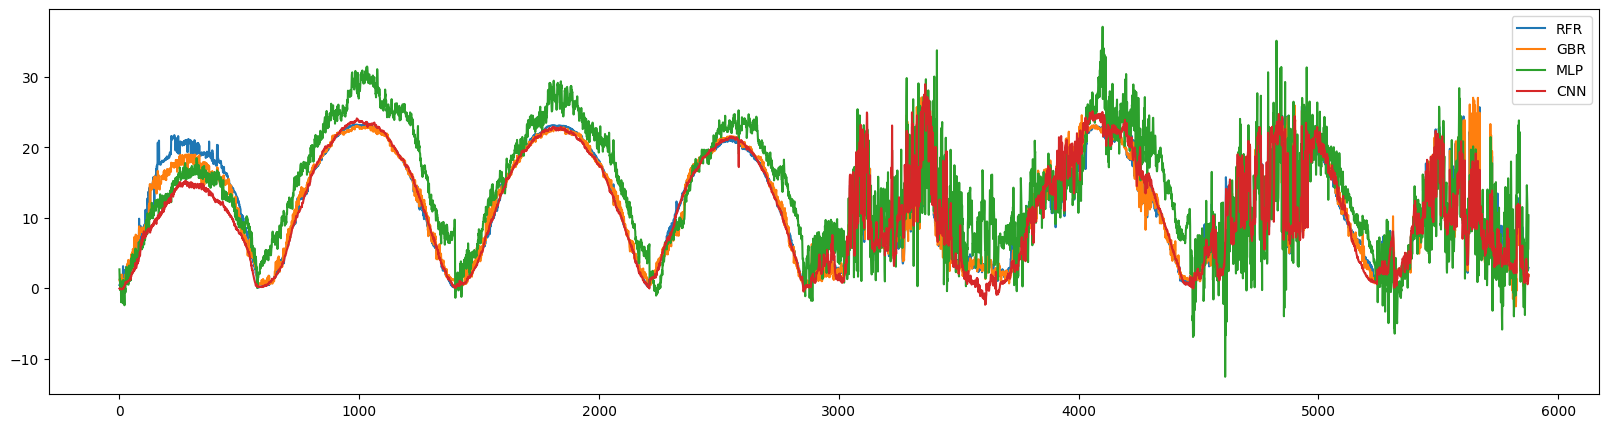

In [28]:
f = plt.figure()
f.set_figheight(5)
f.set_figwidth(20)

# plt.plot(y_test,label="Ground Truth")
plt.plot(RFR_y_pred,label="RFR")
plt.plot(GBR_y_pred,label="GBR")
plt.plot(MLP_y_pred,label="MLP")
plt.plot(CNN_y_pred,label="CNN")
plt.legend()
plt.show()

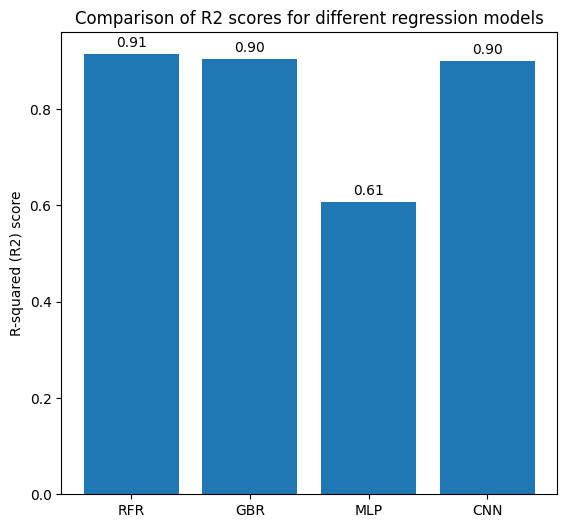

In [26]:
# create a bar plot to compare the R2 scores of the models
fig, ax = plt.subplots()
fig.set_figheight(6)
# fig.set_figwidth(5)
# models = ['Random Forest Regressor','Gradient Boosting Regressor','Multi-Layer Perceptron','Convolutional Neural Network']
models = ['RFR','GBR','MLP','CNN']
scores = [RFR_r2, GBR_r2, MLP_r2, CNN_r2]
rects = ax.bar(models, scores)
ax.set_ylabel('R-squared (R2) score')
ax.set_title('Comparison of R2 scores for different regression models')
# add value labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset text slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()


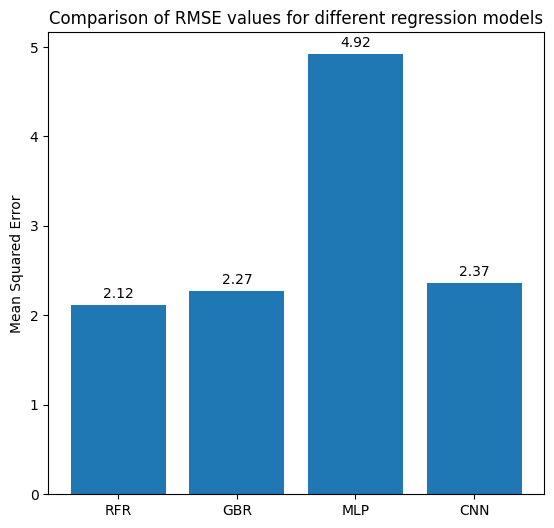

In [27]:
# create a bar plot to compare the R2 scores of the models
fig, ax = plt.subplots()
fig.set_figheight(6)
# fig.set_figwidth(5)
# models = ['Random Forest Regressor','Gradient Boosting Regressor','Multi-Layer Perceptron','Convolutional Neural Network']
models = ['RFR','GBR','MLP','CNN']
scores = [RFR_rmse, GBR_rmse, MLP_rmse, CNN_rmse]
rects = ax.bar(models, scores)
ax.set_ylabel('Mean Squared Error')
ax.set_title('Comparison of RMSE values for different regression models')
# add value labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset text slightly above the bar
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()